**导入基础包**

In [1]:
#packages
import pandas as pd
import numpy as np

from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**读取数据**

In [2]:
df = pd.read_csv('data_features_Order.csv') 

In [3]:
df.head()

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Unclassified,Burkholderiales,...,Syntrophorhabdales,Bradymonadales,Solibacterales,Methylacidiphilales,UASB-TL25,Calditrichales,Reyranellales,Dongiales,Chthonomonadales,Candidatus Yanofskybacteria
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,8.265625,23.570312,...,0.000000,0.042969,0.027344,0.136719,0.058594,0.0,0.109375,0.046875,0.0,0.0
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,8.484375,18.730469,...,0.007812,0.054688,0.054688,0.152344,0.019531,0.0,0.093750,0.093750,0.0,0.0
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,8.308594,19.378906,...,0.000000,0.023438,0.031250,0.132812,0.015625,0.0,0.070312,0.058594,0.0,0.0
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,8.394531,22.824219,...,0.003906,0.035156,0.054688,0.179688,0.035156,0.0,0.109375,0.093750,0.0,0.0
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,8.585938,18.863281,...,0.000000,0.023438,0.039062,0.105469,0.011719,0.0,0.070312,0.082031,0.0,0.0


In [4]:
df.shape

(1186, 179)

In [64]:
df.columns

Index(['Unnamed: 0', 'Sample ID', 'Sampling month average', 'Sampling month',
       'SRTd', 'COD', 'NH4N', 'TP', 'Unclassified', 'Burkholderiales',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=179)

In [82]:
features = ['Sampling month average', 'Sampling month','SRTd', 'COD', 'NH4N', 'TP']
targets = df.columns.to_numpy()

In [83]:
targets

array(['Unnamed: 0', 'Sample ID', 'Sampling month average',
       'Sampling month', 'SRTd', 'COD', 'NH4N', 'TP', 'Unclassified',
       'Burkholderiales', 'Chitinophagales', 'Others', 'Rickettsiales',
       'Bacteroidales', 'Chlamydiales', 'Sphingobacteriales',
       'Bdellovibrionales', 'Polyangiales', 'Rhizobiales',
       'Oscillospirales', 'Anaerolineales', '0319-6G20',
       'Pseudomonadales', 'Gemmatales', 'Cytophagales', 'Babeliales',
       'Pirellulales', 'Flavobacteriales', 'SBR1031', 'Pedosphaerales',
       'Xanthomonadales', 'Phycisphaerales', 'Haliangiales',
       'Saccharimonadales', 'Omnitrophales', 'Candidatus Nomurabacteria',
       'Lachnospirales', 'Myxococcales', 'Woesearchaeales',
       'Microtrichales', 'Christensenellales', 'Caldilineales',
       'Micavibrionales', 'Peptostreptococcales-Tissierellales',
       'Spirochaetales', 'Oligoflexales', 'Candidatus Magasanikbacteria',
       'Chloroplast', 'Nitrospirales', 'Legionellales',
       'Bacteriovoracale

In [97]:
targets = targets[8:]

**简单的EDA**

In [98]:
df.isnull().sum()

Unnamed: 0                     0
Sample ID                      0
Sampling month average         0
Sampling month                 0
SRTd                           0
                              ..
Calditrichales                 0
Reyranellales                  0
Dongiales                      0
Chthonomonadales               0
Candidatus Yanofskybacteria    0
Length: 179, dtype: int64

我们看到预测目标里面没有NA， 不过features里面有NA. 

部分features的空值较多，还不能直接drop. 

考虑给空值部分填充均值。

分拆数据

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


在train data 部分曲均值

In [101]:
train_data[features].mean()

Sampling month average     23.154379
Sampling month            115.381081
SRTd                       15.258321
COD                       430.108594
NH4N                       26.645109
TP                          6.274391
dtype: float64

用这部均值填充NA数据

In [102]:
df['Sampling month average'].fillna(23.154379, inplace = True)
df['Sampling month'].fillna(115.381081, inplace = True)
df['SRTd'].fillna(15.258321, inplace = True)
df['COD'].fillna(430.108594, inplace = True)
df['NH4N'].fillna(26.645109, inplace = True)
df['TP'].fillna(6.274391, inplace = True)

检查NA

In [103]:
df.isnull().sum()

Unnamed: 0                     0
Sample ID                      0
Sampling month average         0
Sampling month                 0
SRTd                           0
                              ..
Calditrichales                 0
Reyranellales                  0
Dongiales                      0
Chthonomonadales               0
Candidatus Yanofskybacteria    0
Length: 179, dtype: int64

重定义训练和测试集

In [104]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


**线性回归**

In [105]:
from sklearn import linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #导入岭回归模型

In [106]:
X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]
y_test = test_data[targets]

In [107]:
ridge = Ridge() #调整训练数据

In [108]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ridge)
])

训练模型

In [109]:
model.fit(X_train, y_train)
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.07774


利用训练好的模型做测试

In [110]:
y_preds = model.predict(X_test)

In [111]:
y_preds

array([[5.44114006e+00, 2.15352194e+01, 1.91031125e+01, ...,
        1.37547018e-01, 3.40557782e-03, 5.52884401e-03],
       [5.72100471e+00, 2.18726627e+01, 1.99395876e+01, ...,
        6.09591613e-02, 3.61343128e-03, 4.61057526e-03],
       [5.72100471e+00, 2.18726627e+01, 1.99395876e+01, ...,
        6.09591613e-02, 3.61343128e-03, 4.61057526e-03],
       ...,
       [4.79200458e+00, 2.28513928e+01, 1.86144280e+01, ...,
        1.06687227e-01, 2.88264315e-03, 5.44228017e-03],
       [4.79200458e+00, 2.28513928e+01, 1.86144280e+01, ...,
        1.06687227e-01, 2.88264315e-03, 5.44228017e-03],
       [4.79200458e+00, 2.28513928e+01, 1.86144280e+01, ...,
        1.06687227e-01, 2.88264315e-03, 5.44228017e-03]])

**结果可视化**

展示第一个ID的预测结果。

In [112]:
y_preds[0]

array([5.44114006e+00, 2.15352194e+01, 1.91031125e+01, 1.64974203e+00,
       7.59222496e-01, 1.09865393e+00, 4.23175523e-01, 3.38059515e+00,
       5.99670353e-01, 1.44526758e+00, 1.80252530e+00, 1.85547737e-01,
       8.42867432e-01, 2.64881550e-01, 3.87863252e+00, 2.77071076e-01,
       2.30699785e+00, 1.73665527e-01, 3.63227010e-01, 1.98337997e+00,
       7.96557002e-01, 5.69693344e-01, 3.12863610e+00, 3.81663450e-01,
       2.44777004e+00, 3.78637468e-01, 5.57467532e-02, 7.98308194e-02,
       1.84206929e-01, 4.18598735e-01, 5.68600742e-02, 9.09516414e-01,
       9.29368815e-02, 4.39222123e-01, 1.99263384e-01, 3.14880435e-01,
       7.43062424e-02, 4.31224989e-02, 4.39079042e-02, 1.64984673e-01,
       1.50400934e+00, 3.95761830e-02, 9.57008207e-02, 9.75764764e-01,
       2.38424260e-01, 2.71668235e-01, 1.81286156e-01, 6.30315071e-02,
       9.68736944e-02, 4.29524375e-02, 5.03925610e-01, 3.51671877e-01,
       8.75090721e-01, 3.06071720e-01, 2.31860373e-01, 3.24400586e-01,
      

In [113]:
y_test.iloc[0].tolist()

[8.75,
 21.375,
 8.75,
 1.48828125,
 0.84375,
 0.76953125,
 0.3984375,
 3.765625,
 0.36328125,
 1.3671875,
 2.640625,
 0.1171875,
 1.76953125,
 0.48046875,
 1.84375,
 0.3125,
 2.06640625,
 0.0625,
 0.34375,
 0.86328125,
 0.33984375,
 1.0546875,
 1.0390625,
 1.08984375,
 9.6953125,
 0.41015625,
 0.0078125,
 0.0625,
 0.07421875,
 0.28125,
 0.04296875,
 0.609375,
 0.02734375,
 0.58203125,
 0.1875,
 0.15234375,
 0.09765625,
 0.03125,
 0.0234375,
 0.0078125,
 1.6210937500000002,
 0.0078125,
 0.046875,
 1.03125,
 0.19921875,
 0.234375,
 0.078125,
 0.28125,
 0.0234375,
 0.0390625,
 2.94921875,
 0.2109375,
 0.14453125,
 0.4140625,
 0.26171875,
 0.1015625,
 0.4414062499999999,
 0.4921875,
 0.63671875,
 0.30859375,
 0.17578125,
 0.27734375,
 0.01953125,
 0.02734375,
 1.0234375,
 0.0390625,
 1.12890625,
 0.00390625,
 0.08984375,
 0.50390625,
 0.0703125,
 0.0234375,
 0.02734375,
 0.33984375,
 0.05078125,
 0.25,
 1.4453125,
 0.00390625,
 0.6171875,
 0.33203125,
 0.33203125,
 0.83984375,
 0.41796875

In [114]:
c = {"classes":targets,
     "predictions":y_preds[0],
    "real":y_test.iloc[0].tolist() }

In [115]:
com = pd.DataFrame(c)
com = com.set_index('classes')
com

,predictions,real
classes,,
Unclassified,5.441140,8.750000
Burkholderiales,21.535219,21.375000
Chitinophagales,19.103112,8.750000
Others,1.649742,1.488281
Rickettsiales,0.759222,0.843750
...,...,...
Calditrichales,0.087516,0.000000
Reyranellales,0.119876,0.125000
Dongiales,0.137547,0.031250


预测和实际结果的柱状图对比

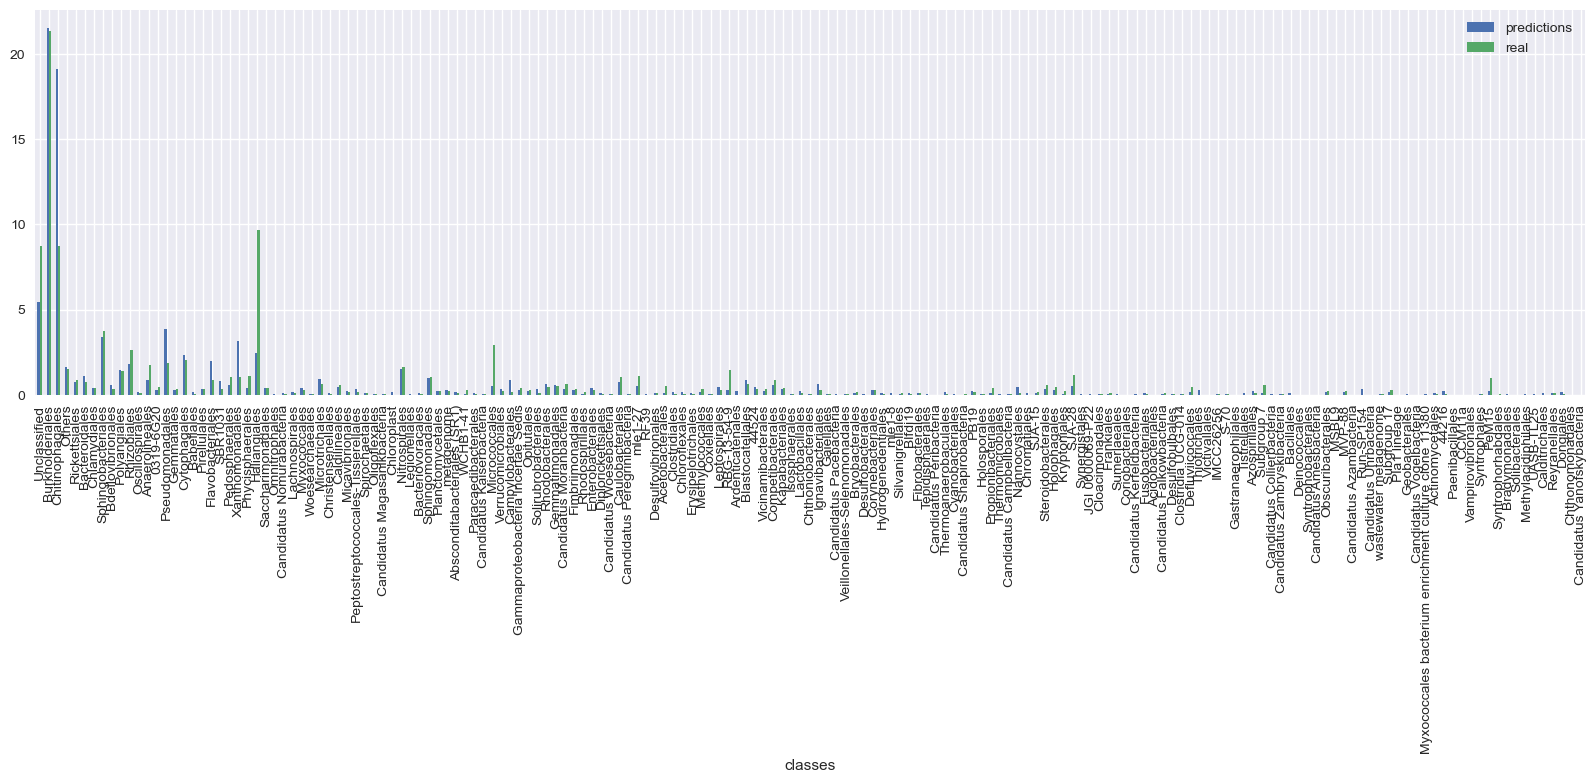

In [116]:
com.plot(kind='bar',figsize=(20,5));

预测和实际结果的散点图对比。

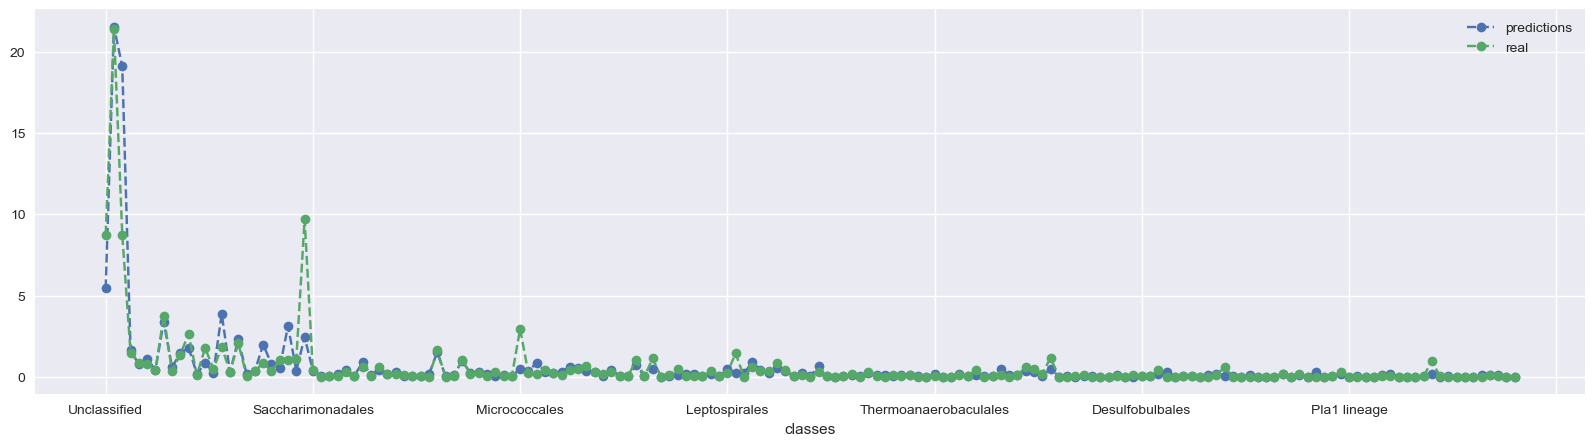

In [117]:
com.plot(kind='line',style='--o',figsize=(20,5));

上面是第一个预测结果和实际结果的对比，修改参数可以对比其他列。也可以汇总对比均值。

**模型评估**

训练集部分

R^2

In [118]:
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.07774


训练集的MSE

In [119]:
from sklearn import metrics

In [120]:
y_preds2 = model.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

1.3910437400209652

测试集部分

In [121]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MSE

2.982797334901369

In [122]:
RMSE = metrics.mean_squared_error(y_test, y_preds)**0.5
RMSE

1.7270776864117516

In [123]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MAE

0.3828379365352026

In [124]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_preds)
MAPE

83577754366949.38

# 调参和优化

In [125]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

In [126]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [127]:
# Get parameters list
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('regressor', Ridge())],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': Ridge(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__alpha': 1.0,
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__max_iter': None,
 'regressor__normalize': 'deprecated',
 'regressor__positive': False,
 'regressor__random_state': None,
 'regressor__solver': 'auto',
 'regressor__tol': 0.001}

In [128]:
# Perform Gridsearch and fit
param_grid = {"regressor__alpha": [0.001,0.01,0.1,1,5,10,50,100,500,1000,5000,10000,]}

In [129]:
gs = GridSearchCV(model, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 5, 10, 50,
                                              100, 500, 1000, 5000, 10000]},
             verbose=1)

In [130]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=10000))])

In [131]:
print(f'R^2 Train: {gs.score(X_train, y_train):0.4}')

R^2 Train: 0.01493


调参后的R2变得更小了。

In [132]:
y_preds1 = gs.predict(X_test)

In [133]:
MSE = metrics.mean_squared_error(y_test, y_preds1)
MSE

2.7523251740048034

调参后的MSE 也变得更小了，相比之前。所以针对这个线性回归，我们采用调参后的参数。

作为对比，我们打印训练集的MSE，看看差距大不大。

In [134]:
y_preds2 = gs.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

1.5617595068608097